## import important library

## Library Information

**Contractions**</br>
Contractions are combinations of words that are shortened by dropping letters and replacing them with apostrophes. In NLP, it's vital to convert the text into a presentable form using text processing, which is suitable for our task. </br>
**re means Regular Expression, is a sequence of characters that forms a search pattern.**  </br>
**TensorFlow:**  TensorFlow offers tools and resources for building neural machine translation models, including sequence-to-sequence architectures.</br>
n metrics. </br>
**NLTK:**  The Natural Language Toolkit (NLTK) provides libraries and algorithms for text processing tasks, including tokenization, stemming, and languag</br>ranslation.**  </br>
**Spacy:**  It helps computers understand text by breaking it down into smaller pieces like words and sentences, and then analyzing them to find out things like what each word means. </br>
** 

In [1]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import indian
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

import unicodedata
import string
import spacy
import re
import contractions

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras.layers import Input,Embedding, LSTM, Dense,Bidirectional,TimeDistributed
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df=pd.read_csv("Dataset_English_Hindi.csv")

In [3]:
df.head()

,English,Hindi
0,Help!,बचाओ!
1,Jump.,उछलो.
2,Jump.,कूदो.
3,Jump.,छलांग.
4,Hello!,नमस्ते।


In [4]:
df.columns

Index(['English', 'Hindi'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130476 entries, 0 to 130475
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  130474 non-null  object
 1   Hindi    130164 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [6]:
df.columns

Index(['English', 'Hindi'], dtype='object')

In [7]:
df.shape

(130476, 2)

In [8]:
df.isnull().sum()

English      2
Hindi      312
dtype: int64

In [9]:
# drop all the null values from the dataset 

df.dropna(inplace=True)

In [10]:
df.isnull().sum()

English    0
Hindi      0
dtype: int64

In [11]:
# convrting the all the English alphabets into Lower Case

df['English']=df['English'].str.lower()

In [12]:
df.sample()

,English,Hindi
90578,"the herring gull, in its freedom,","हर्रिंग गुल,अपनी आजादी में"


In [13]:
# Removing HTML Tags Dataset

def remove_html(text):
    if isinstance(text,str):
        
        pattern = re.compile('<.*?>')
        return pattern.sub(r'',text)
    else:
        return text

df['English'] = df['English'].apply(remove_html)
df['Hindi'] = df['Hindi'].apply(remove_html)

In [14]:
#Find the maximum length of the sentence 

def max_length(tensor):
    return max(len(t) for t in tensor)# Removing URL's from Dataset

def remove_url(text):
    if isinstance(text,str):
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'',text)
    else:
        return
df['English'] = df['English'].apply(remove_url)
df['Hindi'] = df['Hindi'].apply(remove_url)

In [15]:
# Removing Non-Hindi and Alphanumeric characters 

def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text
    
    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")
        
df['English'] = df['English'].apply(lambda x: preprocess_text(x, language='english'))
df['Hindi'] = df['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

In [16]:
# Removing Punctuations 

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def get_hindi_punctuations():
    hindi_punctuations = []
    for i in range(0x2000, 0x206f + 1):
        char = chr(i)
        if unicodedata.category(char) == 'Po':
            hindi_punctuations.append(char)
    return ''.join(hindi_punctuations)

# Get Hindi punctuation characters
hindi_punctuation = get_hindi_punctuations()

# Print Hindi punctuation characters
print('Hindi Punctuation: ', hindi_punctuation)

Hindi Punctuation:  ‖‗†‡•‣․‥…‧‰‱′″‴‵‶‷‸※‼‽‾⁁⁂⁃⁇⁈⁉⁊⁋⁌⁍⁎⁏⁐⁑⁓⁕⁖⁗⁘⁙⁚⁛⁜⁝⁞


In [18]:
def remove_punctuation(text, language = 'English'):
    if language == 'English':
        exclude_english = set(string.punctuation)
        return ''.join(char for char in text if char not in exclude_english)
    elif language == 'Hindi':
        return ''.join(char for char in text if char not in hindi_punctuation)
    
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")
        
  
df['English'] = df['English'].apply(lambda x: remove_punctuation(x,language = 'English'))
df['Hindi'] = df['Hindi'].apply(lambda x: remove_punctuation(x,language = 'Hindi'))

In [19]:
# Removing contractions

def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

df['English'] = df['English'].apply(expand_contractions)

In [20]:
# Tokenize the text

def do_tokenization(text):
    token_words = word_tokenize(text)
    return token_words

df['English'] = df['English'].apply(do_tokenization)
df['Hindi'] = df['Hindi'].apply(do_tokenization)

In [21]:
df.sample(6)

,English,Hindi
116028,"[it, seems, that, in, the, early, days, before...","[ऐसा, प्रतीत, होता, हैं, कि, बगावत, से, पहले, ..."
74921,"[td, from, the, time, i, was, very, young, onw...","[जब, मैं, बहुत, छोटा, था, तभी, से]"
6596,"[chiranji, lalone, laipedri, of, delhihe, decl...","[चिरंजी, लाल, दिल्ली, का, एक, लैपिडरी, प्रधान,..."
14077,"[all, the, fences, i, wanted, to, mend]","[और, वो, सारे, टूटे, रिश्ते, जो, मैं, जोडना, च..."
120702,"[and, then, they, smiled]","[और, फिर, मुस्कराया।]"
56645,"[what, was, very, surprising, to, me, was, tom...","[मेरे, लिए, बहुत, आश्चर्य, की, बात, थी, क्या, ..."


In [22]:
# Removing Stop Words
# here, we need to download it so that "nltk.download('stopwords')"

nltk.download('indian')

[nltk_data] Downloading package indian to
[nltk_data]     C:\Users\Niraj\AppData\Roaming\nltk_data...
[nltk_data]   Package indian is already up-to-date!


True

In [23]:
len(nltk.corpus.indian.words('hindi.pos'))

9408

In [24]:
stop_words_english = set(stopwords.words('english'))
stop_words_hindi = set(nltk.corpus.indian.words('hindi.pos'))

In [25]:
def remove_stopwords(text,language = 'english'):
    if language == 'english':
        filtered_words_english = [word for word in text if word.lower() not in stop_words_english]
        return ' '.join(filtered_words_english)
    elif language == 'hindi':
        filterd_words_hindi = [word for word in text if word not in stop_words_hindi]
        return ' '.join(filterd_words_hindi)
    else:
        return ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")
    
df['English'] = df['English'].apply(lambda x :remove_stopwords(x,language = 'english'))
df['Hindi'] = df['Hindi'].apply(lambda x :remove_stopwords(x,language = 'hindi'))

In [26]:
df.sample(6)

,English,Hindi
30354,later started living ghaat region agra mathura,आगरा मथुरा गऊघाट आकर थे।
90262,lawyer must never tell direct lie save client ...,मुवक़्किल प्रत्यक्ष बोल थावह प्रमाण
117342,good,
115048,closeknit social order well adapted needs chan...,बदलते आवश्यकताओं निर्मित सुदृढ़ सामाजिक थीयह उ...
93829,actually see license plate samara,आप वास्तव देख समारा लाइसेंस प्लेट
31065,series darshan,श्रेणीदर्शन


In [27]:
# Stemming the text

def do_stemming(token_words):
    ps = PorterStemmer()
    words = token_words.split()
    return [ps.stem(word) for word in words]

df['English'] = df['English'].apply(do_stemming)
df['Hindi'] = df['Hindi'].apply(do_stemming)

In [28]:
df.sample(6)

,English,Hindi
80524,"[close, relat, ladi, mountbatten]","[लेडी, माउंटबेटन, नजदीकी, सम्बन्ध]"
58919,"[note, context, amaravati, stupa, reveal, leve...","[संदर्भ, योग़्य, अमरावती, स्तूप, नीचे, दफनाए, ..."
42215,"[ravan, threaten, seeta, hanuman, reach, ashok...","[हनुमान, अशोकवाटिका, पहुँचे, रावण, सीता, धमका,..."
112359,"[bloodstream, fix, thing]","[हमे, ठीक, गुजरेंगे]"
19950,"[said, jail, author, intim, time, hang, come, ...","[जेल, फाँसी, वक्त, रुको, क्रांतिकारी, मिल]"
103823,"[whole, design, system, wrong]","[यत्र, डिज़ाइन, मे, गडगड]"


**word cloud**
</br> Generating a word cloud for language translation condenses the most frequent words in a visual format, aiding quick identification of key terms and patterns, facilitating communication of important information visually.

In [29]:
from wordcloud import WordCloud

In [30]:
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))
    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

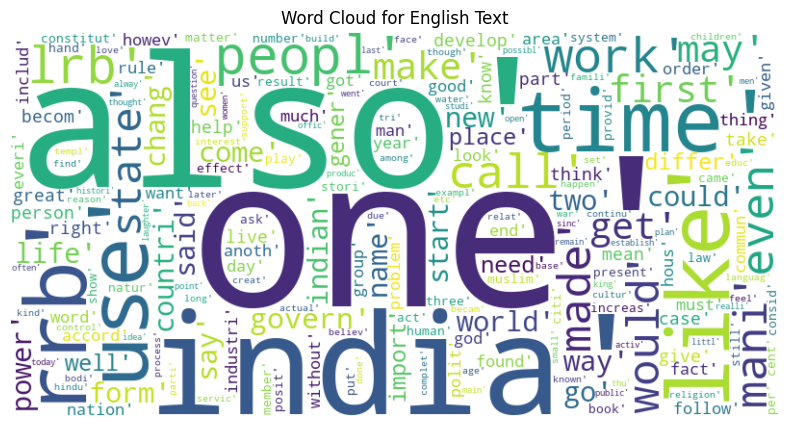

In [31]:
generate_wordcloud(df['English'], 'English')

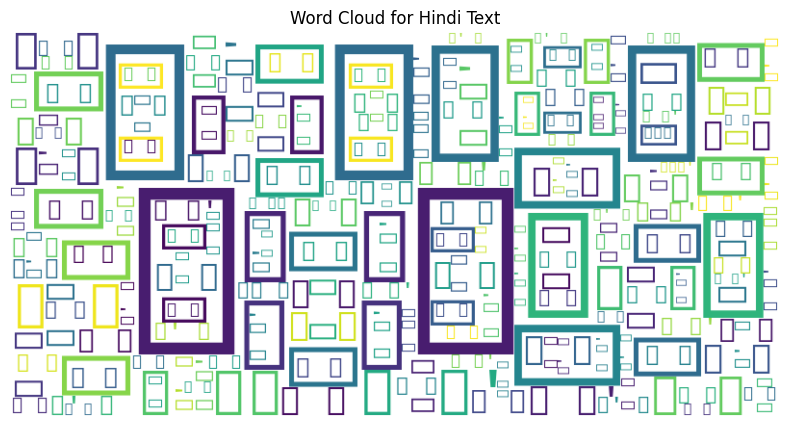

In [32]:
generate_wordcloud(df['Hindi'], 'Hindi')

**Calculate the Maximum Sequence Length of Dataset**

In [33]:
def calculate_max_sequence_length(text):
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)
    return max_length_combined

In [34]:
max_length_combined_x = calculate_max_sequence_length(df['English'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_x)
max_length_combined_y = calculate_max_sequence_length(df['Hindi'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_y)

Maximum sequence length in combined dataset x:  218
Maximum sequence length in combined dataset x:  133


**Apply Tokenization on Data**

In [35]:
tok = Tokenizer()
tok.fit_on_texts(df['English'])

In [36]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(df['Hindi'])

In [37]:
# These tokens are typically used to mark the beginning and end of sequences.
tok_hindi.word_index['<start>'] = len(tok_hindi.word_index) + 1
tok_hindi.word_index['<end>'] = len(tok_hindi.word_index) + 1

In [38]:
len(tok.word_index), len(tok_hindi.word_index)

(56738, 75241)

**here, we are create an  list of sequences (like sentences) and adds special tokens "<"start">" and "<'end'>" at the beginning and end of each sequence respectively.**

In [39]:
def add_special_tokens(sequences, start_token='<start>', end_token='<end>'):
    sequences_with_special_tokens = []
    for sequence in sequences:
        sequence_with_special_tokens = [start_token] + sequence + [end_token]
        sequences_with_special_tokens.append(sequence_with_special_tokens)
    return sequences_with_special_tokens

In [40]:
df['Hindi'] = add_special_tokens(df['Hindi'])

## Convert the Words into Number

In [41]:
df['English'] = tok.texts_to_sequences(df['English'])
df['Hindi'] = tok_hindi.texts_to_sequences(df['Hindi'])

In [42]:
def calculate_max_sequence_length(text):
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)
    return max_length_combined

max_length_combined_x = calculate_max_sequence_length(df['English'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_x)
max_length_combined_y = calculate_max_sequence_length(df['Hindi'])
print("Maximum sequence length in combined dataset x: ", max_length_combined_y)

Maximum sequence length in combined dataset x:  218
Maximum sequence length in combined dataset x:  135


In [43]:
df.sample(6)

,English,Hindi
99718,"[1697, 9221, 477, 490, 49266, 2673, 609, 49267...","[75240, 12352, 38619, 8458, 5062, 38619, 66814..."
107740,"[3441, 65, 4708, 2869, 12557, 12, 18, 685, 102...","[75240, 34, 3380, 10, 2697, 180, 4346, 69216, ..."
102565,"[516, 41, 86, 15081, 142, 1865, 742, 2406, 5, ...","[75240, 1487, 31117, 43, 1337, 742, 802, 75241]"
87295,"[763, 58, 594, 16, 3273, 7309]","[75240, 475, 2333, 1582, 75241]"
85488,"[295, 687]","[75240, 10, 6299, 75241]"
100245,"[754, 133, 130, 148]","[75240, 3779, 241, 983, 75241]"


## Train_Test_Split the Dataset

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
english = df['English']
hindi = df['Hindi']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(english,hindi,test_size = 0.2, random_state = 42)

In [47]:
print("Training set shape: ",x_train.shape,y_train.shape)
print("Testing set shape: ",x_test.shape,y_test.shape)

Training set shape:  (104129,) (104129,)
Testing set shape:  (26033,) (26033,)


**Padding of the Data**  </br>
The pad_sequences function is used in NLP for ensure that all sequences in a dataset have the same length. 

In [48]:
x_train_main = pad_sequences(x_train, maxlen=max_length_combined_x, padding='post')
y_train_main = pad_sequences(y_train, maxlen=max_length_combined_y, padding='post')

In [49]:
x_test_main = pad_sequences(x_test, maxlen=max_length_combined_x, padding='post')
y_test_main = pad_sequences(y_test, maxlen=max_length_combined_y, padding='post')

In [50]:
x_train_main

array([[ 122, 1433,  802, ...,    0,    0,    0],
       [ 165,  671, 1220, ...,    0,    0,    0],
       [2304, 2025,  331, ...,    0,    0,    0],
       ...,
       [  71,   17, 3396, ...,    0,    0,    0],
       [   9,    8,   51, ...,    0,    0,    0],
       [ 668,  654, 1035, ...,    0,    0,    0]])

In [51]:
x_test_main

array([[   61,    30,    52, ...,     0,     0,     0],
       [  138,   255,  2899, ...,     0,     0,     0],
       [   39,   105, 14066, ...,     0,     0,     0],
       ...,
       [  159,  3968,  2461, ...,     0,     0,     0],
       [   17,    28,  1151, ...,     0,     0,     0],
       [21844,   126,    16, ...,     0,     0,     0]])

In [52]:
y_train_main

array([[75240,   420,  3984, ...,     0,     0,     0],
       [75240,   824, 23699, ...,     0,     0,     0],
       [75240, 15544, 40414, ...,     0,     0,     0],
       ...,
       [75240,    77, 16860, ...,     0,     0,     0],
       [75240,   849,   234, ...,     0,     0,     0],
       [75240,  4447,  4506, ...,     0,     0,     0]])

In [53]:
y_test_main

array([[75240, 25359, 20397, ...,     0,     0,     0],
       [75240,   485, 18199, ...,     0,     0,     0],
       [75240,   968,    61, ...,     0,     0,     0],
       ...,
       [75240, 65179,  1645, ...,     0,     0,     0],
       [75240,   371,   490, ...,     0,     0,     0],
       [75240,  2421,  5824, ...,     0,     0,     0]])

## Creating an Model

In [54]:
def create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_units):
   # Encoder
    encoder_inputs = Input(shape=(max_seq_length_input,))
    encoder_embedding = Embedding(input_dim=vocab_size_input, output_dim=embedding_dim, input_length=max_seq_length_input)(encoder_inputs)
    encoder_bilstm1 = Bidirectional(LSTM(hidden_dim, return_sequences=True, dropout=0.1))(encoder_embedding)
    encoder_bilstm2 = Bidirectional(LSTM(hidden_dim, return_sequences=True, dropout=0.1))(encoder_bilstm1)
    encoder_bilstm3 = Bidirectional(LSTM(hidden_dim, return_sequences=True, dropout=0.1))(encoder_bilstm2)
    encoder_lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(hidden_dim, return_state=True))(encoder_bilstm3)
    encoder_states = [forward_h, forward_c, backward_h, backward_c]
    
    # Decoder
    decoder_inputs = Input(shape=(max_seq_length_output,))
    decoder_embedding = Embedding(input_dim=vocab_size_output, output_dim=embedding_dim, input_length=max_seq_length_output)(decoder_inputs)
    decoder_bilstm1 = Bidirectional(LSTM(hidden_dim, return_sequences=True, dropout=0.1))(decoder_embedding, initial_state=encoder_states)
    decoder_bilstm2 = Bidirectional(LSTM(hidden_dim, return_sequences=True, dropout=0.1))(decoder_bilstm1)
    decoder_bilstm3 = Bidirectional(LSTM(hidden_dim, return_sequences=True, dropout=0.1))(decoder_bilstm2)
    decoder_lstm = LSTM(hidden_dim, return_sequences=True)(decoder_bilstm3)
    decoder_outputs = TimeDistributed(Dense(vocab_size_output, activation='softmax'))(decoder_lstm)

    
    # Define the model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    print(model.summary())
    return model

In [55]:
vocab_size_input = len(tok.word_index) + 1  
vocab_size_output = len(tok_hindi.word_index) + 1  

print("Vocabulary size for English:", vocab_size_input)
print("Vocabulary size for Hindi:", vocab_size_output)

Vocabulary size for English: 56739
Vocabulary size for Hindi: 75242


In [56]:
def calculate_max_sequence_length(text):
    combined_sequences = text
    max_length_combined = max(len(sequence) for sequence in combined_sequences)

    return max_length_combined

max_seq_length_input = calculate_max_sequence_length(df['English'])
print("Maximum sequence length in combined english dataset: ", max_seq_length_input)
max_seq_length_output = calculate_max_sequence_length(df['Hindi']) - 1
print("Maximum sequence length in combined hindi dataset: ", max_seq_length_output)

Maximum sequence length in combined english dataset:  218
Maximum sequence length in combined hindi dataset:  134


In [57]:
embedding_dim = 100  
hidden_dim = 256  
batch_size = 64


model = create_model(vocab_size_input, vocab_size_output, max_seq_length_input, max_seq_length_output, embedding_dim, hidden_dim)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 218)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 218, 100)     5673900     ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 218, 512)     731136      ['embedding[0][0]']              
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 218, 512)    1574912     ['bidirectional[0][0]']          
 )                                                                                            

## Save the Checkpoint During the Training

In [58]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),  # Stop training if validation loss stops improving for 3 epochs
    ModelCheckpoint(filepath='model_checkpoint_{epoch:02d}.h5', save_best_only=True, save_weights_only=True, monitor='val_loss')  # Save the model with the best validation loss
]

**Training of The Model**

In [ ]:
history = model.fit(x=[x_train_main, y_train_main[:, :-1]],  # Exclude last token from decoder input
                    y=y_train_main[:, 1:],  # Exclude first token from decoder target
                    batch_size=batch_size,
                    epochs=4,
                    validation_data=([x_test_main, y_test_main[:, :-1]], y_test_main[:, 1:]),
                    callbacks=callbacks)

Epoch 1/4
 141/1628 [=>............................] - ETA: 44:20:15 - loss: 1.6260 - accuracy: 0.9405